# Explore different options for document vectorization

In [1]:
from yelp.loader import load_sample, stars
import pandas as pd

In [2]:
limit = 3_000
data = list(stars(load_sample()))[:limit]
documents, y = list(zip(*data))

## Tokenization and normalization

### Example 1 (SpaCy)
- simple string cleaning
- lowercase
- lemmatization
- POS filtering

In [3]:
import spacy
from yelp.vectorize import spacy_tokenizer

In [4]:
nlp = spacy.load('en_core_web_lg')

**Example**

In [5]:
text = documents[10]
print(text)
print(spacy_tokenizer(nlp, text, lowercase=True, lemma=True, pos_filter=['PUNCT', 'DET']))

The poutines are good, the strength of the place is its variety and ambiance. I wouldn't say its the best place for poutine however.
['poutine', 'be', 'good', 'strength', 'of', 'place', 'be', 'its', 'variety', 'and', 'ambiance', 'i', 'would', 'not', 'say', 'its', 'good', 'place', 'for', 'poutine', 'however']


#### Count Vectorizer
From [sklearn CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [6]:
from yelp.vectorize import spacy_count_vectorizer

In [7]:
X, vectorizer = spacy_count_vectorizer(nlp, documents, lowercase=True, lemma=True, pos_filter=['PUNCT', 'DET'], min_df=2)

In [8]:
features = vectorizer.get_feature_names_out()
print(len(features))
print(features[:10])

6437
['!' '#' '$' '%' '&' "'" "'cause" "'s" "'ve" '*']


In [9]:
Xdf = pd.DataFrame(X.toarray(), columns=features)
Xdf.head()

,!,#,$,%,&,','cause,'s,'ve,*,...,zuma,zur,,£,à,ça,étaient,était,été,über
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
test_doc = 10
print(documents[test_doc])
print([(w, score) for w, score in Xdf.iloc[test_doc].sort_values(ascending=False).head(20).items()])

The poutines are good, the strength of the place is its variety and ambiance. I wouldn't say its the best place for poutine however.
[('its', 2), ('good', 2), ('place', 2), ('be', 2), ('poutine', 2), ('not', 1), ('would', 1), ('however', 1), ('for', 1), ('say', 1), ('ambiance', 1), ('i', 1), ('variety', 1), ('of', 1), ('and', 1), ('strength', 1), ('pimento', 0), ('pillowy', 0), ('pillow', 0), ('pic', 0)]


### Example 2 (word_tokenizer)
- simple string cleaning
- lowercase
- no lemmatization
- no POS filtering

In [14]:
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
simple_tokenizer = lambda x: [w.lower() for w in word_tokenize(x)]

In [15]:
vectorizer = CountVectorizer(tokenizer=simple_tokenizer, token_pattern=None, min_df=2)
W = vectorizer.fit_transform(documents)
Wdf = pd.DataFrame(W.toarray(), columns=vectorizer.get_feature_names_out())

In [17]:
Wdf 

,!,#,$,%,&,','','cause,'d,'em,...,zum,zuma,zur,~,à,ça,étaient,était,été,über
0,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2998,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Features exploration

Let's define the notion of document frequency as:
$$
df(w) = \mid \{d: w \in d\} \mid
$$

In [22]:
df = Wdf.astype(bool).sum(axis=0)

#### Plot words in the space of documents by showing their DF

In [23]:
from sklearn.manifold import TSNE 
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
tsne = TSNE(n_components=2)
W2d = tsne.fit_transform(Wdf.T)

In [48]:
high_df_words_indexes = [i for i, (k, w) in enumerate(df.items()) if w > 300]
low_df_words_indexes = [i for i, (k, w) in enumerate(df.items()) if 20 < w < 300]

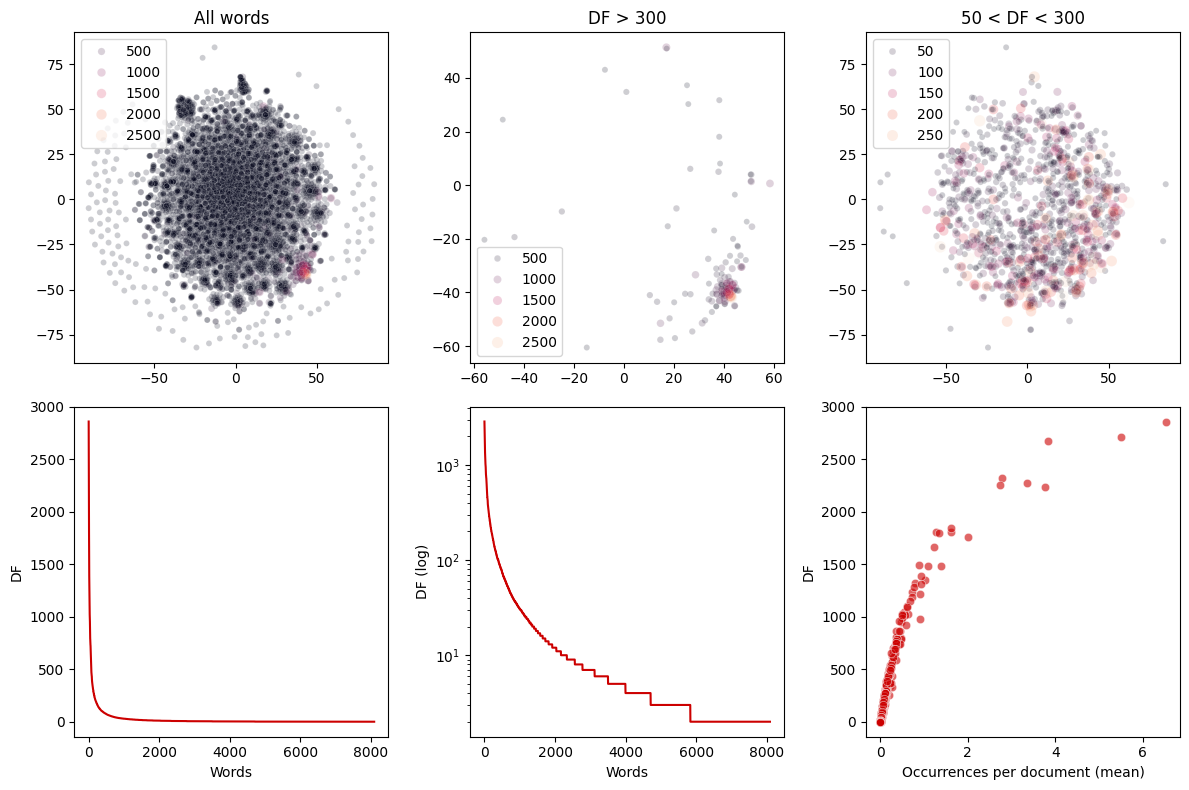

In [75]:
fig, ax = plt.subplots(figsize=(12, 8), ncols=3, nrows=2)
sns.scatterplot(x=W2d[:,0], y=W2d[:,1], ax=ax[0, 0], alpha=.2, hue=df, palette="rocket", size=df)
sns.scatterplot(x=W2d[high_df_words_indexes,0], y=W2d[high_df_words_indexes,1], 
                ax=ax[0, 1], alpha=.2, hue=df.values[high_df_words_indexes], palette="rocket", size=df.values[high_df_words_indexes])
sns.scatterplot(x=W2d[low_df_words_indexes,0], y=W2d[low_df_words_indexes,1], 
                ax=ax[0, 2], alpha=.2, hue=df.values[low_df_words_indexes], palette="rocket", size=df.values[low_df_words_indexes])
ax[0, 0].set_title('All words')
ax[0, 1].set_title('DF > 300')
ax[0, 2].set_title('50 < DF < 300')
leg = ax[0, 0].get_legend()
leg.set_title("")

sns.lineplot(x=range(df.shape[0]), y=df.sort_values(ascending=False).values, ax=ax[1, 0], color='#cc0000')
sns.lineplot(x=range(df.shape[0]), y=df.sort_values(ascending=False).values, ax=ax[1, 1], color='#cc0000')
sns.scatterplot(x=Wdf.mean(axis=0), y=df, ax=ax[1, 2], alpha=.6, color='#cc0000')
ax[1, 1].set_yscale('log')
ax[1, 0].set_xlabel('Words')
ax[1, 0].set_ylabel('DF')
ax[1, 1].set_xlabel('Words')
ax[1, 1].set_ylabel('DF (log)')
ax[1, 2].set_xlabel('Occurrences per document (mean)')
ax[1, 2].set_ylabel('DF')
plt.tight_layout()
plt.show()